In [655]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

#from matplotlib import mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
import numpy as np

#This is the sensor model library
import models as sm

sm = reload(sm) #Reload it every time this cell is run (for when changes are made)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [623]:
#For each class of files, generate a general file name with placeholders for the number and inserting 'cap' or 'con'

airFileName = "22March/air%d%s.csv"
water00FileName = "28March/DI-Water/DI_water%d%s.csv"
water10FileName = "28March/NaCl-10/NaCl_10%d%s.csv"
water20FileName = "28March/NaCl-20/NaCl_20%d%s.csv"
water30FileName = "28March/NaCl-30/NaCl_30%d%s.csv"
water40FileName = "28March/NaCl-40/NaCl_40%d%s.csv"
water50FileName = "28March/NaCl-50/NaCl_50%d%s.csv"

In [631]:
#Initialize arrays of sweeps, one for each known class

print "Opening data..."

subSize = 5 #Size of the data matrices (the whole thing is 8x8, but using a subset of the data makes everything faster)

#In each one, exclude the last element (that will go into the test array)
airData = [sm.Sweep(airFileName%(i,'%s'),subSize) for i in range(1,10)]
water00Data = [sm.Sweep(water00FileName%(i,'%s'),subSize) for i in range(1,10)]
water10Data = [sm.Sweep(water10FileName%(i,'%s'),subSize) for i in range(1,10)]
water20Data = [sm.Sweep(water20FileName%(i,'%s'),subSize) for i in range(1,10)]
water30Data = [sm.Sweep(water30FileName%(i,'%s'),subSize) for i in range(1,10)]
water40Data = [sm.Sweep(water40FileName%(i,'%s'),subSize) for i in range(2,10)]
water50Data = [sm.Sweep(water50FileName%(i,'%s'),subSize) for i in range(1,10)]

Opening data...


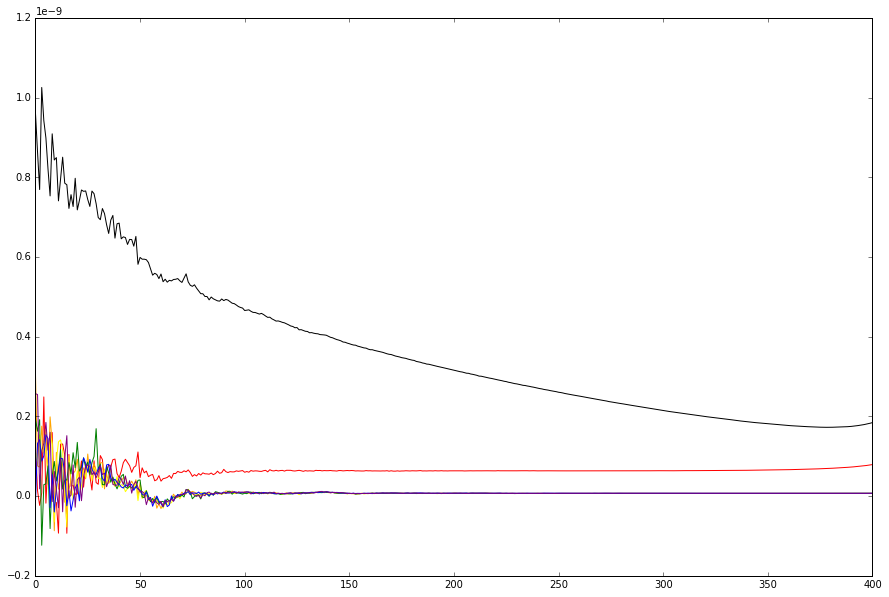

In [632]:
#Plot one intersection of one sweep from each class, just to get a sense of how the data looks

m = 401
X = range(m)

trial = 3

af = file(airFileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'red')
af.close()

af = file(water00FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'orange')
af.close()

af = file(water10FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'yellow')
af.close()

af = file(water20FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'green')
af.close()

af = file(water30FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'blue')
af.close()

af = file(water40FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'purple')
af.close()

af = file(water50FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'black')
af.close()

plt.show()

In [633]:
#Initialize an array of test sweeps

testingData = [
    sm.Sweep(airFileName%(10,'%s'),subSize),
    sm.Sweep(water00FileName%(10,'%s'),subSize),
    sm.Sweep(water10FileName%(10,'%s'),subSize),
    sm.Sweep(water20FileName%(10,'%s'),subSize),
    sm.Sweep(water30FileName%(10,'%s'),subSize),
    sm.Sweep(water40FileName%(10,'%s'),subSize),
    sm.Sweep(water50FileName%(10,'%s'),subSize)
]

In [635]:
#Initialize a model for each class

print "Initializing models..."

order = 8

airModel = sm.Model(order,'Air')
water00Model = sm.Model(order,'DI Water')
water10Model = sm.Model(order,'10 mM NaCl')
water20Model = sm.Model(order,'20 mM NaCl')
water30Model = sm.Model(order,'30 mM NaCl')
water40Model = sm.Model(order,'40 mM NaCl')
water50Model = sm.Model(order,'50 mM NaCl')

Initializing models...


In [636]:
#Train each model

print "Training models..."

airModel.train(airData)
water00Model.train(water00Data)
water10Model.train(water10Data)
water20Model.train(water20Data)
water30Model.train(water30Data)
water40Model.train(water40Data)
water50Model.train(water50Data)

Training models...
Training Air model...
Training DI Water model...
Training 10 mM NaCl model...
Training 20 mM NaCl model...
Training 30 mM NaCl model...
Training 40 mM NaCl model...
Training 50 mM NaCl model...


In [640]:
#Test the testing array with each model

print "Testing..."

print "Testing air model..."
airModel.test(testingData)

print "Testing DI water model..."
water00Model.test(testingData)

print "Testing 10 mM NaCl model..."
water10Model.test(testingData)

print "Testing 20 mM NaCl model..."
water20Model.test(testingData)

print "Testing 30 mM NaCl model..."
water30Model.test(testingData)

print "Testing 40 mM NaCl model..."
water40Model.test(testingData)

print "Testing 50 mM NaCl model..."
water50Model.test(testingData)

Testing...
Testing air model...
Testing DI water model...
Testing 10 mM NaCl model...
Testing 20 mM NaCl model...
Testing 30 mM NaCl model...
Testing 40 mM NaCl model...
Testing 50 mM NaCl model...


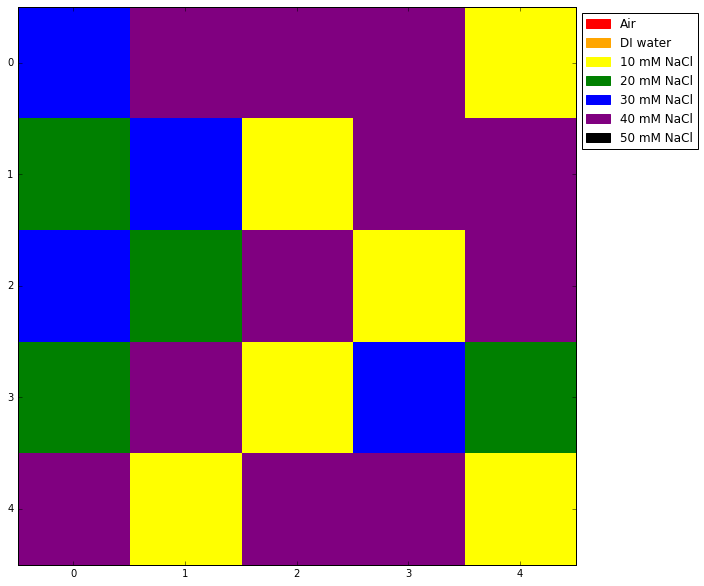

In [667]:
zvals = [[
        0 if i == 'Air' else
        1 if i == 'DI Water' else
        2 if i == '10 mM NaCl' else
        3 if i == '20 mM NaCl' else
        4 if i == '30 mM NaCl' else
        5 if i == '40 mM NaCl' else
        6 if i == '50 mM NaCl' else 7
        for i in j] for j in testingData[3].genClass()]

cmap = mpl.colors.ListedColormap(['red','orange','yellow','green','blue','purple','black'])
bounds=[0,1,2,3,4,5,6,7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
img = pyplot.imshow(zvals,interpolation='nearest',
                    cmap = cmap,norm=norm)

plt.legend(handles=[
        mpat.Patch(color='red', label='Air'),
        mpat.Patch(color='orange', label='DI water'),
        mpat.Patch(color='yellow', label='10 mM NaCl'),
        mpat.Patch(color='green', label='20 mM NaCl'),
        mpat.Patch(color='blue', label='30 mM NaCl'),
        mpat.Patch(color='purple', label='40 mM NaCl'),
        mpat.Patch(color='black', label='50 mM NaCl')
    ],loc="upper left", bbox_to_anchor=(1,1))

plt.show()

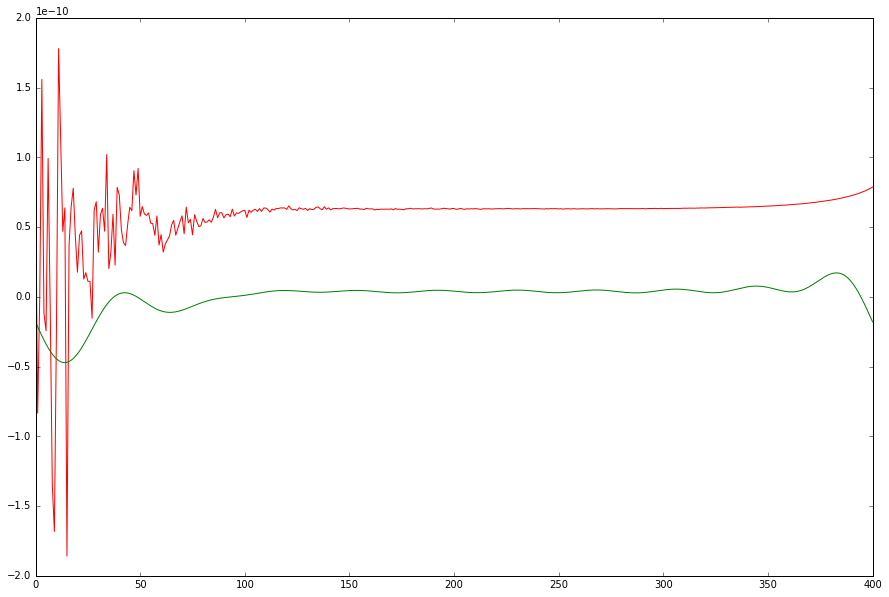

In [390]:
#Generate 'average' plots of the data from each model

m = 401
X = range(m)

T = X[m-1]-X[0]
w = (2*3.1415)/T

af = file(airFileName%(1,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'r-')

#plt.plot(X,[np.real(airModel.avgPlot(x)) for x in X],'b-')

#for x in X:
#    print "Actual %d"%x
#    print sum([airData[0].c(n)[0][0]*(2.718**(1j*n*w*x)) for n in range(-order,0)]),sum([airData[0].c(n)[0][0]*(2.718**(1j*n*w*x)) for n in range(1,order+1)])
#    print sum([airData[0].c(n)[0][0]*(2.718**(1j*n*w*x)) for n in range(-order,0)])+sum([airData[0].c(n)[0][0]*(2.718**(1j*n*w*x)) for n in range(1,order+1)])

plt.plot(X,[np.real(sum([airData[0].c(n)[0][0]*(2.718**(1j*n*w*x)) for n in range(-order,order+1)])) for x in X],'g-')

plt.show()